In [1]:
#特徴変換 PCA

import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [2]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBF5D37E88>,
      dtype=object)

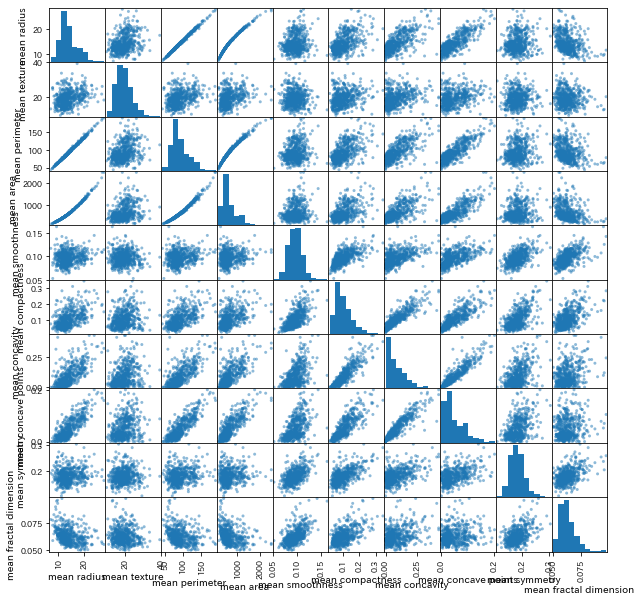

In [5]:
df  = pd.DataFrame(data.data[:,0:10],
                  columns=data.feature_names[0:10])
scatter_matrix(df,figsize=(10,10))

C:\Users\unknow\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 720x720 with 0 Axes>

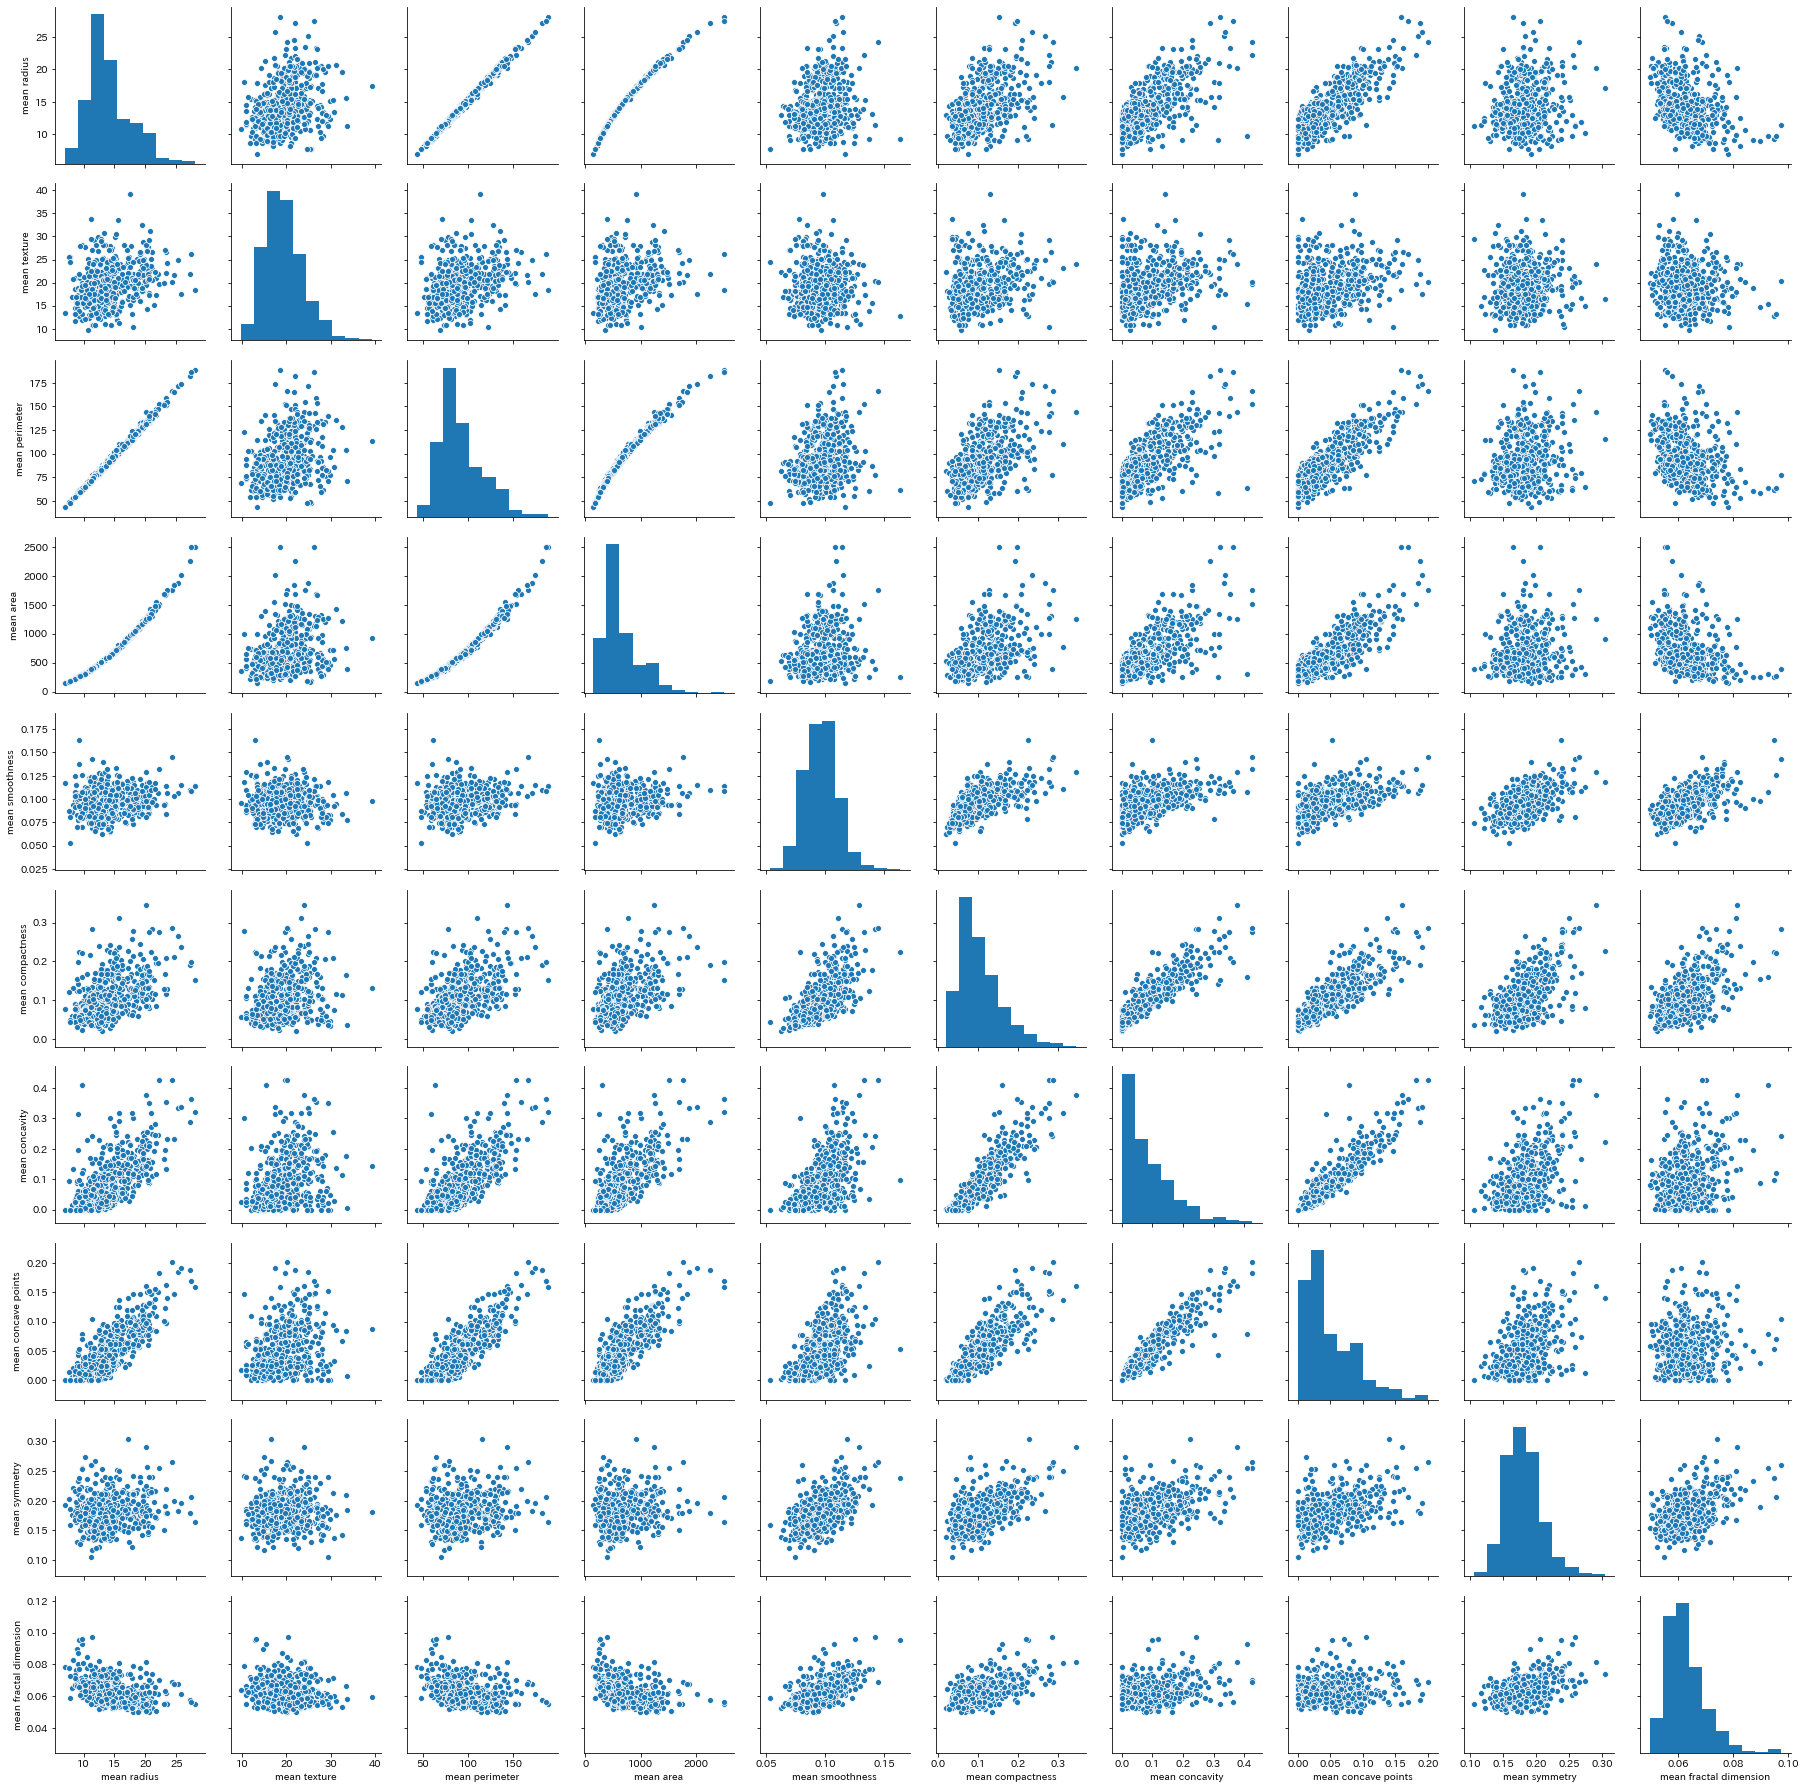

In [6]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBFDB6C688>,
      dtype=object)

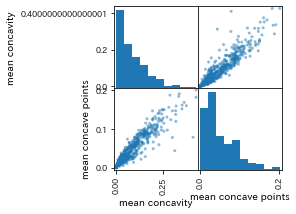

In [7]:
df = pd.DataFrame(data.data[:,6:8],
                 columns=data.feature_names[6:8])
scatter_matrix(df, figsize=(3,3))

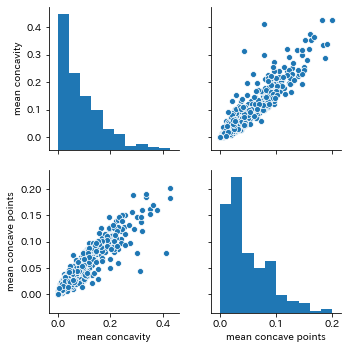

In [8]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBFD8F1148>,
      dtype=object)

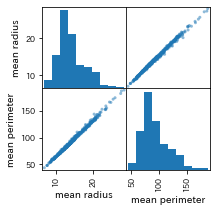

In [9]:
df = pd.DataFrame(data.data[:,[0,2]], columns=data.feature_names[[0,2]])
scatter_matrix(df, figsize=(3,3))

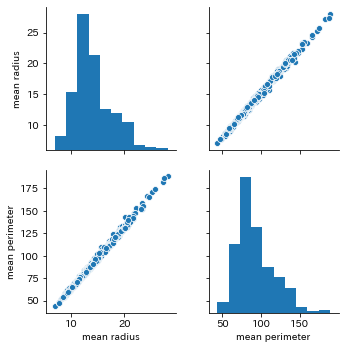

In [10]:
sns.pairplot(df)

In [11]:
X = data.data[:,[0,2]]
y = data.target
names = data.feature_names[[0,2]]

In [12]:
X.shape, y.shape

((569, 2), (569,))

Text(0, 0.5, 'mean perimeter')

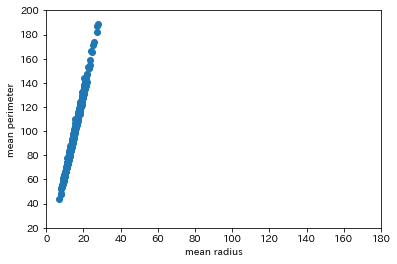

In [13]:
plt.scatter(X[:,0], X[:,1])
plt.xlim(0,180)
plt.ylim(20,200)
plt.xlabel(names[0])
plt.ylabel(names[1])

In [14]:
# 主成分分析
from sklearn.decomposition import PCA

In [15]:
pca = PCA()

In [16]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
X_new = pca.transform(X)

(-60, 120)

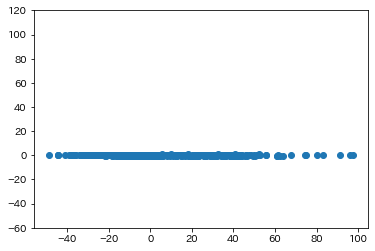

In [18]:
plt.scatter(X_new[:, 0], X_new[:,1])
plt.ylim(-60,120)

In [19]:
pca.explained_variance_

array([6.02807278e+02, 5.21213668e-02])

In [20]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([9.99913543e-01, 8.64569199e-05])

In [21]:
pca.explained_variance_ratio_

array([9.99913543e-01, 8.64569199e-05])

Text(0, 0.5, 'mean concave points')

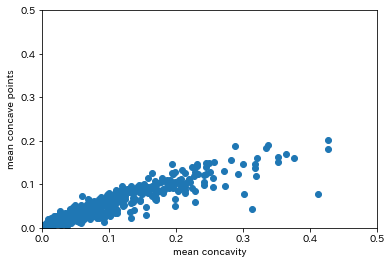

In [22]:
X = data.data[:,[6,7]]
y = data.target
names = data.feature_names[[6,7]]

plt.scatter(X[:,0], X[:,1])
plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.xlabel(names[0])
plt.ylabel(names[1])

(-0.25, 0.25)

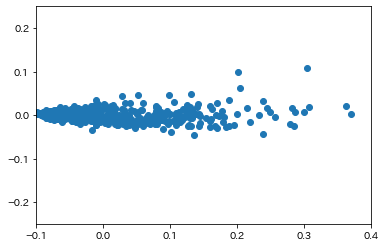

In [23]:
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:,0] ,X_new[:,1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [24]:
pca.explained_variance_

array([0.00767254, 0.00018837])

In [25]:
pca.explained_variance_ratio_ # 寄与率

array([0.97603731, 0.02396269])

In [26]:
# eigで検算
m = X.mean(axis=0)

In [27]:
Xp =(X-m)

In [28]:
C = Xp.transpose().dot(Xp)

In [29]:
w, _ = np.linalg.eig(C)

In [30]:
w

array([4.3580028 , 0.10699332])

In [31]:
w /w.sum()

array([0.97603731, 0.02396269])

In [32]:
# data全体でやる

X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)
train_index, test_index = next(ss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [33]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

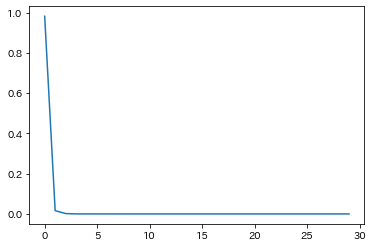

In [34]:
plt.plot(pca.explained_variance_ratio_)

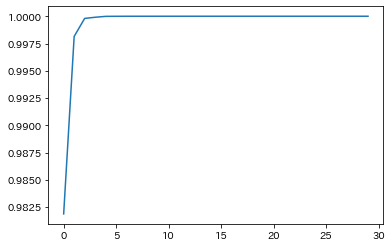

In [35]:
# 寄与率
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [36]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [37]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [38]:
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9473684210526315

In [39]:
clf.fit(X_train_pca[:,0:1], y_train)
clf.score(X_test_pca[:,0:1], y_test)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9210526315789473

In [40]:
clf.fit(X_train_pca[:,0:3], y_train)
clf.score(X_test_pca[:,0:3], y_test)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9473684210526315

In [41]:
scores = []
i_range = range(1, 31)
for i in i_range:
    clf.fit(X_train_pca[:,0:i],y_train)
    scores.append(clf.score(X_test_pca[:,0:i], y_test))
    
scores = np.array(scores)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

(0.7, 1)

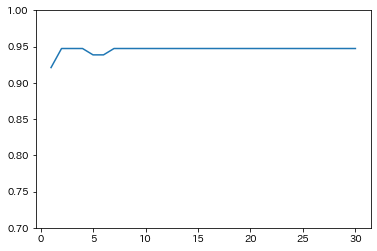

In [42]:
plt.plot(i_range, scores)
plt.ylim(0.7,1)

In [43]:
clf.fit(X_train_pca[:,0:2], y_train)
clf.score(X_test_pca[:,0:2], y_test)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9473684210526315

In [44]:
# Lec48 -- 特徴変換(非線形)
from sklearn.preprocessing import PolynomialFeatures

In [45]:
polf = PolynomialFeatures(degree=2)

In [46]:
polf.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [47]:
X_train_poly = polf.transform(X_train)
X_test_poly = polf.transform(X_test)

In [48]:
X_train.shape, X_train_poly.shape

((455, 30), (455, 496))

In [49]:
clf.fit(X_train_poly, y_train)
clf.score(X_test_poly, y_test)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9649122807017544

In [50]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.956140350877193

In [51]:
pca.fit(X_train_poly)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

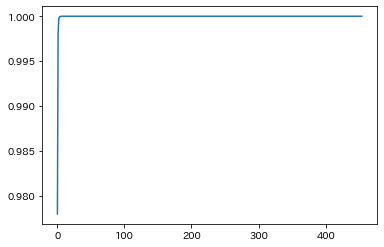

In [52]:
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [53]:
scores = []

n_features = X_train_poly.shape[1]
i_range = range(1, n_features, 10)

X_train_poly_pca = pca.transform(X_train_poly)
X_test_poly_pca = pca.transform(X_test_poly)

for i in i_range:
    clf.fit(X_train_poly_pca[:,0:i], y_train)
    scores.append(clf.score(X_test_poly_pca[:, 0:i], y_test))
    
scores = np.array(scores)

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of i

C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\unknow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silenc

Text(0.5, 1.0, 'max 0.9737 as 421')

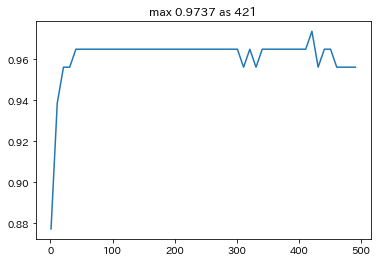

In [54]:
plt.plot(i_range, scores)
plt.title('max {0:.4f} as {1}'.format(scores.max(), i_range[np.argmax(scores)]))